# 8. Case Study Results

In [1]:
import json
import textwrap
import statistics
from typing import Any, Dict, List, Union

import matplotlib.pyplot as plt

In [2]:
def _load_experiment(experiment: str) -> Dict[str, Any]:
    with open(f"../data/{experiment}/experiment.json", "r") as handle:
        return json.load(handle)


def _load_predictions(experiment: str) -> List[Dict[str, Any]]:
    predictions = []

    with open(f"../data/{experiment}/predictions.jsonl", "r") as handle:
        for line in handle.readlines():
            predictions.append(json.loads(line))

    return predictions

In [3]:
def _select(
    predictions: List[Dict[str, Any]],
    column: Union["similarity", "inference_duration", "metric_duration"],
) -> List[float]:
    values = []

    for prediction in predictions:
        values.append(prediction[column])

    return values


def _print_descriptives(values: List[float]) -> None:
    _count = len(values)
    _mean = round(statistics.mean(values), 4)
    _std = round(statistics.stdev(values), 4)
    _min = round(min(values), 4)
    _25 = round(statistics.quantiles(values, n=4, method="inclusive")[0], 4)
    _50 = round(statistics.quantiles(values, n=4, method="inclusive")[1], 4)
    _75 = round(statistics.quantiles(values, n=4, method="inclusive")[2], 4)
    _max = round(max(values), 4)

    print("+----------+----------+----------+----------+----------+----------+----------+----------+")
    print("| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |")
    print("+----------+----------+----------+----------+----------+----------+----------+----------+")
    print(f"| {_count:<8} | {_mean:<8} | {_std:<8} | {_min:<8} | {_25:<8} | {_50:<8} | {_75:<8} | {_max:<8} |")
    print("+----------+----------+----------+----------+----------+----------+----------+----------+")


def _print_predictions(
    predictions: List[Dict[str, Any]],
    n: int = 5,
    ascending: bool = False,
) -> None:
    sorted_predictions = sorted(
        predictions, key=lambda p: p["similarity"], reverse=not ascending
    )

    print("+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+")
    print("| references                                         | question                       | answer                         | prediction                     |")
    print("+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+")
    for prediction_idx in range(0, min(len(predictions), n)):
        prediction = sorted_predictions[prediction_idx]

        # Wrap text
        wrap_references = textwrap.wrap(" ".join(prediction["references"]), 50)
        wrap_question = textwrap.wrap(prediction["question"], 30)
        wrap_answer = textwrap.wrap(prediction["answer"], 30)
        wrap_prediction = textwrap.wrap(prediction["prediction"], 30)

        # Format text
        for line_idx in range(
            0,
            max(
                len(wrap_references),
                len(wrap_question),
                len(wrap_answer),
                len(wrap_prediction),
            ),
        ):
            reference = wrap_references[line_idx] if line_idx < len(wrap_references) else ""
            question = wrap_question[line_idx] if line_idx < len(wrap_question) else ""
            answer = wrap_answer[line_idx] if line_idx < len(wrap_answer) else ""
            prediction = wrap_prediction[line_idx] if line_idx < len(wrap_prediction) else ""

            print(f"| {reference:<50} | {question:<30} | {answer:<30} | {prediction:<30} |")

        print("+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+")

## 8.1 Base Model + Simple Prompt Results

In [4]:
base_model_experiment = _load_experiment("case_study_base_model")
base_model_predictions = _load_predictions("case_study_base_model")

### 8.1.1 Accuracy

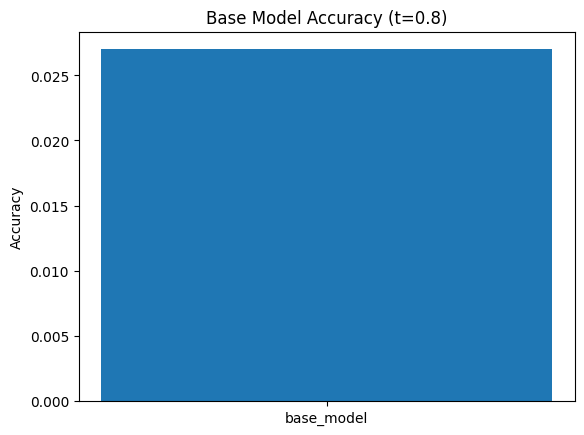

In [5]:
plt.bar(["base_model"], [base_model_experiment["scores"]["accuracy"]], color="tab:blue")
plt.title("Base Model Accuracy (t=0.8)")
plt.ylabel("Accuracy")
plt.show()

### 8.1.2 Similarity

In [6]:
base_model_similarities = _select(base_model_predictions, "similarity")

In [7]:
_print_descriptives(base_model_similarities)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 0.4576   | 0.2259   | 0.0      | 0.4479   | 0.5328   | 0.5702   | 1.0      |
+----------+----------+----------+----------+----------+----------+----------+----------+


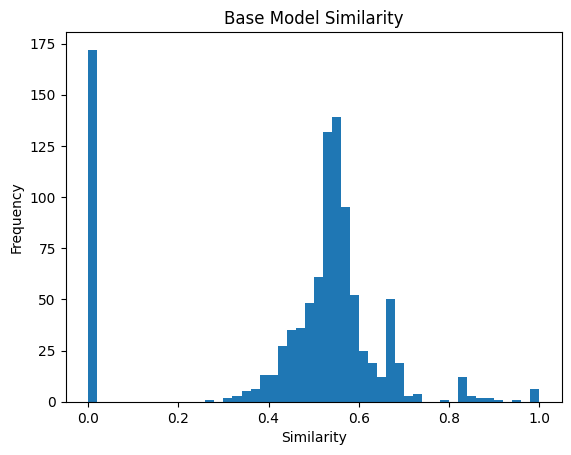

In [8]:
plt.hist(base_model_similarities, bins=50, color="tab:blue")
plt.title("Base Model Similarity")
plt.xlabel("Similarity")
plt.ylabel("Frequency")
plt.show()

### 8.1.3 Duration

In [9]:
base_model_inference_durations = _select(base_model_predictions, "inference_duration")
base_model_metric_durations = _select(base_model_predictions, "metric_duration")

In [10]:
_print_descriptives(base_model_inference_durations)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 8.943    | 12.2059  | 1        | 3.0      | 4.0      | 10.0     | 100      |
+----------+----------+----------+----------+----------+----------+----------+----------+


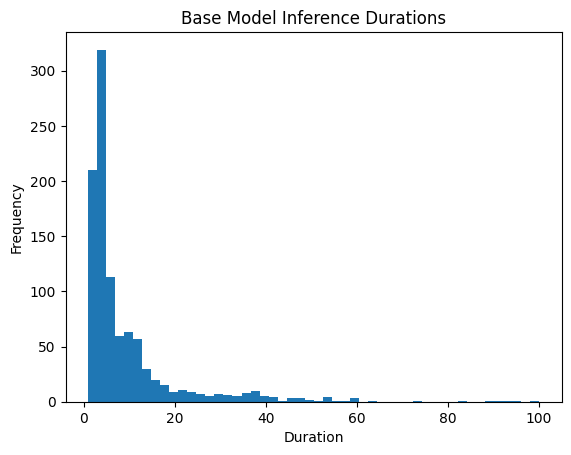

In [11]:
plt.hist(base_model_inference_durations, bins=50, color="tab:blue")
plt.title("Base Model Inference Durations")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

In [12]:
_print_descriptives(base_model_metric_durations)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 0        | 0.0      | 0        | 0.0      | 0.0      | 0.0      | 0        |
+----------+----------+----------+----------+----------+----------+----------+----------+


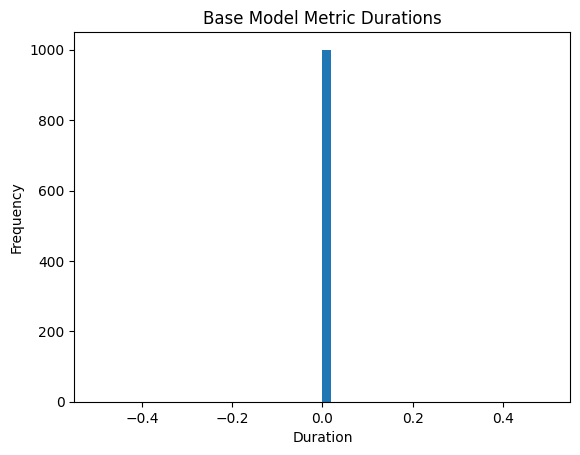

In [13]:
plt.hist(base_model_metric_durations, bins=50, color="tab:blue")
plt.title("Base Model Metric Durations")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

### 8.1.4 Predictions

In [14]:
base_model_prediction_lengths = [len(prediction["prediction"]) for prediction in base_model_predictions]

In [15]:
_print_descriptives(base_model_prediction_lengths)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 216.131  | 187.6976 | 7        | 89.0     | 141.0    | 290.0    | 1549     |
+----------+----------+----------+----------+----------+----------+----------+----------+


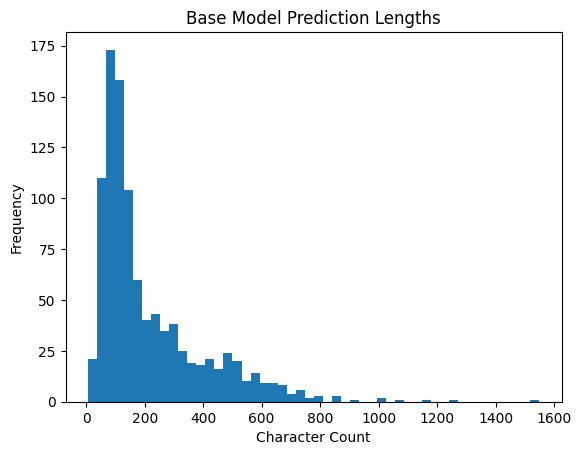

In [16]:
plt.hist(base_model_prediction_lengths, bins=50, color="tab:blue")
plt.title("Base Model Prediction Lengths")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

In [17]:
_print_predictions(base_model_predictions, n=5, ascending=False)

+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| references                                         | question                       | answer                         | prediction                     |
+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| The Rhine is the longest river in Germany. It is   | The Rhine is the longest river | Germany                        | Germany                        |
| here that the Rhine encounters some more of its    | in what country?               |                                |                                |
| main tributaries, such as the Neckar, the Main     |                                |                                |                                |
| and, later, the Moselle, which contributes an      |                      

In [18]:
_print_predictions(base_model_predictions, n=5, ascending=True)

+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| references                                         | question                       | answer                         | prediction                     |
+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| In 1507, he was ordained to the priesthood, and in | When was Martin Luther         | 1507                           | Martin Luther was ordained as  |
| 1508, von Staupitz, first dean of the newly        | ordained as a priest?          |                                | a priest in 1507.              |
| founded University of Wittenberg, sent for Luther, |                                |                                |                                |
| to teach theology. He received a bachelor's degree |                      

## 8.2 Finetuned Model + Simple Prompt Results

### 8.2.1 1-Epoch Training Results

In [19]:
finetuned_model_epochs_1_experiment = _load_experiment("case_study_finetune_model_epochs_1")
finetuned_model_epochs_1_predictions = _load_predictions("case_study_finetune_model_epochs_1")

#### 8.2.1.1 Accuracy

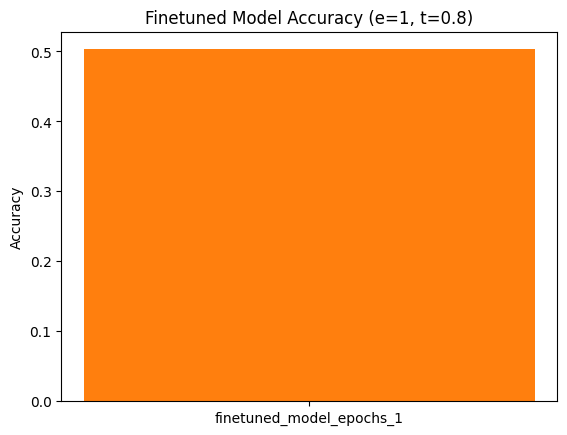

In [20]:
plt.bar(["finetuned_model_epochs_1"], [finetuned_model_epochs_1_experiment["scores"]["accuracy"]], color="tab:orange")
plt.title("Finetuned Model Accuracy (e=1, t=0.8)")
plt.ylabel("Accuracy")
plt.show()

#### 8.2.1.2 Similarity

In [21]:
finetuned_model_epochs_1_similarities = _select(finetuned_model_epochs_1_predictions, "similarity")

In [22]:
_print_descriptives(finetuned_model_epochs_1_similarities)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 0.7749   | 0.1928   | 0.0      | 0.6709   | 0.808    | 0.96     | 1.0      |
+----------+----------+----------+----------+----------+----------+----------+----------+


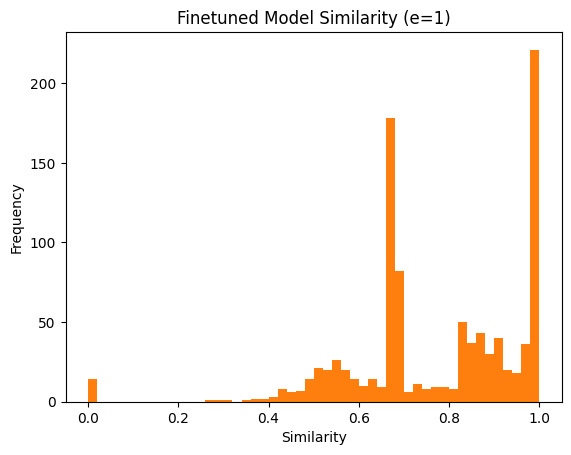

In [23]:
plt.hist(finetuned_model_epochs_1_similarities, bins=50, color="tab:orange")
plt.title("Finetuned Model Similarity (e=1)")
plt.xlabel("Similarity")
plt.ylabel("Frequency")
plt.show()

#### 8.2.1.3 Duration

In [24]:
finetuned_model_epochs_1_inference_durations = _select(finetuned_model_epochs_1_predictions, "inference_duration")
finetuned_model_epochs_1_metric_durations = _select(finetuned_model_epochs_1_predictions, "metric_duration")

In [25]:
_print_descriptives(finetuned_model_epochs_1_inference_durations)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 53.268   | 38.2705  | 1        | 11.0     | 73.5     | 86.0     | 104      |
+----------+----------+----------+----------+----------+----------+----------+----------+


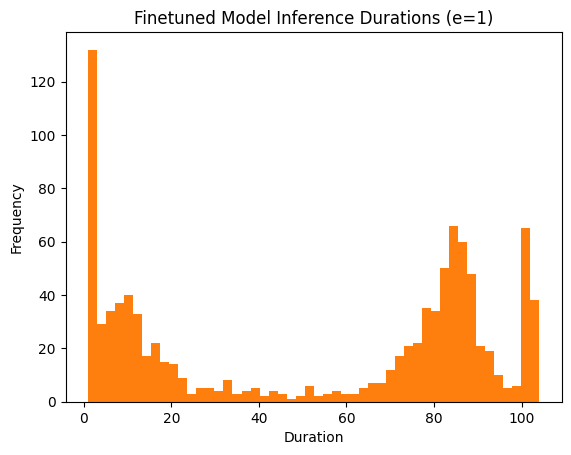

In [26]:
plt.hist(finetuned_model_epochs_1_inference_durations, bins=50, color="tab:orange")
plt.title("Finetuned Model Inference Durations (e=1)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

In [27]:
_print_descriptives(finetuned_model_epochs_1_metric_durations)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 0        | 0.0      | 0        | 0.0      | 0.0      | 0.0      | 0        |
+----------+----------+----------+----------+----------+----------+----------+----------+


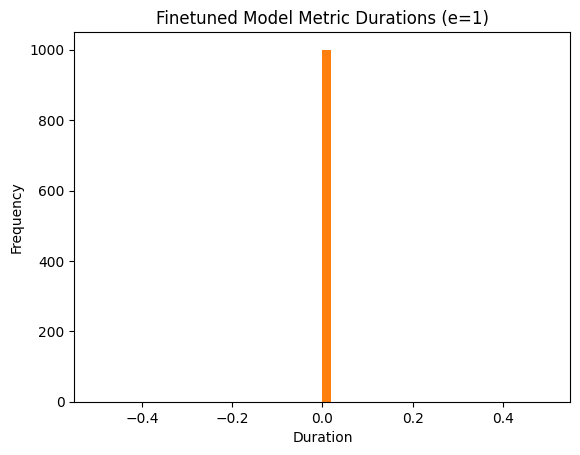

In [28]:
plt.hist(finetuned_model_epochs_1_metric_durations, bins=50, color="tab:orange")
plt.title("Finetuned Model Metric Durations (e=1)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

#### 8.2.1.4 Predictions

In [29]:
finetuned_model_epochs_1_prediction_lengths = [len(prediction["prediction"]) for prediction in finetuned_model_epochs_1_predictions]

In [30]:
_print_descriptives(finetuned_model_epochs_1_prediction_lengths)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 128.051  | 273.328  | 1        | 14.0     | 31.0     | 106.0    | 3542     |
+----------+----------+----------+----------+----------+----------+----------+----------+


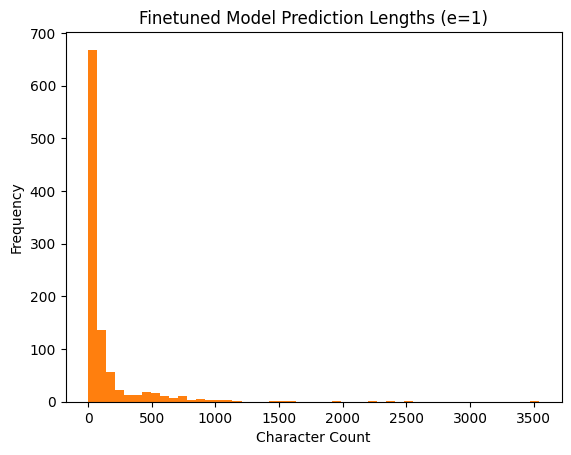

In [31]:
plt.hist(finetuned_model_epochs_1_prediction_lengths, bins=50, color="tab:orange")
plt.title("Finetuned Model Prediction Lengths (e=1)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

In [32]:
_print_predictions(finetuned_model_epochs_1_predictions, n=5, ascending=False)

+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| references                                         | question                       | answer                         | prediction                     |
+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| In 1507, he was ordained to the priesthood, and in | When was Martin Luther         | 1507                           | 1507                           |
| 1508, von Staupitz, first dean of the newly        | ordained as a priest?          |                                |                                |
| founded University of Wittenberg, sent for Luther, |                                |                                |                                |
| to teach theology. He received a bachelor's degree |                      

In [33]:
_print_predictions(finetuned_model_epochs_1_predictions, n=5, ascending=True)

+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| references                                         | question                       | answer                         | prediction                     |
+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| Clearly, some tumors evade the immune system and   | What is a chemical secreted by | cytokine TGF-β                 | TGF-β                          |
| go on to become cancers. Tumor cells often have a  | tumors that suppresses the     |                                |                                |
| reduced number of MHC class I molecules on their   | immune response?               |                                |                                |
| surface, thus avoiding detection by killer T       |                      

### 8.2.2 2-Epoch Training Results

In [34]:
finetuned_model_epochs_2_experiment = _load_experiment("case_study_finetune_model_epochs_2")
finetuned_model_epochs_2_predictions = _load_predictions("case_study_finetune_model_epochs_2")

#### 8.2.2.1 Accuracy

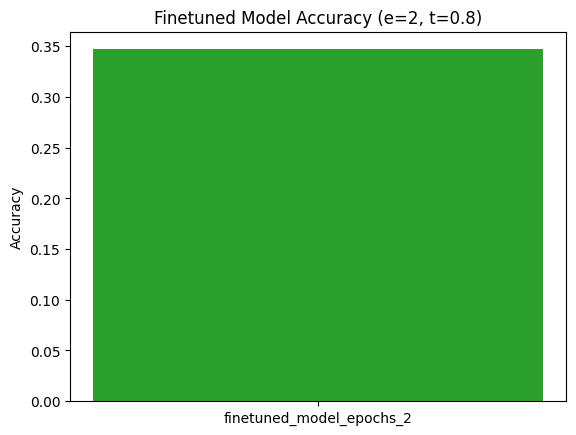

In [35]:
plt.bar(["finetuned_model_epochs_2"], [finetuned_model_epochs_2_experiment["scores"]["accuracy"]], color="tab:green")
plt.title("Finetuned Model Accuracy (e=2, t=0.8)")
plt.ylabel("Accuracy")
plt.show()

#### 8.2.2.2 Similarity

In [36]:
finetuned_model_epochs_2_similarities = _select(finetuned_model_epochs_2_predictions, "similarity")

In [37]:
_print_descriptives(finetuned_model_epochs_2_similarities)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 0.7303   | 0.1698   | 0.0      | 0.6677   | 0.6803   | 0.8507   | 1.0      |
+----------+----------+----------+----------+----------+----------+----------+----------+


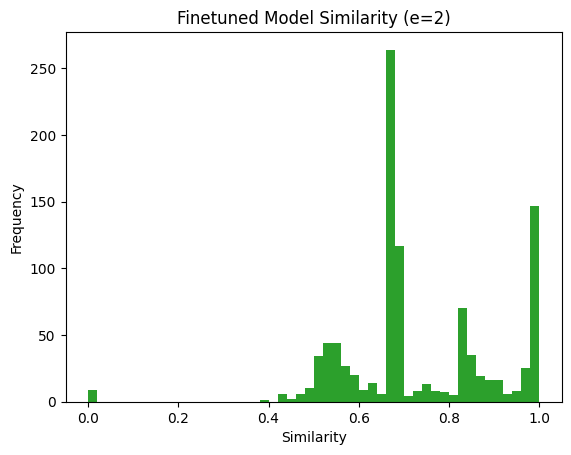

In [38]:
plt.hist(finetuned_model_epochs_2_similarities, bins=50, color="tab:green")
plt.title("Finetuned Model Similarity (e=2)")
plt.xlabel("Similarity")
plt.ylabel("Frequency")
plt.show()

#### 8.2.2.3 Duration

In [39]:
finetuned_model_epochs_2_inference_durations = _select(finetuned_model_epochs_2_predictions, "inference_duration")
finetuned_model_epochs_2_metric_durations = _select(finetuned_model_epochs_2_predictions, "metric_duration")

In [40]:
_print_descriptives(finetuned_model_epochs_2_inference_durations)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 80.615   | 15.3506  | 4        | 77.0     | 83.0     | 87.0     | 108      |
+----------+----------+----------+----------+----------+----------+----------+----------+


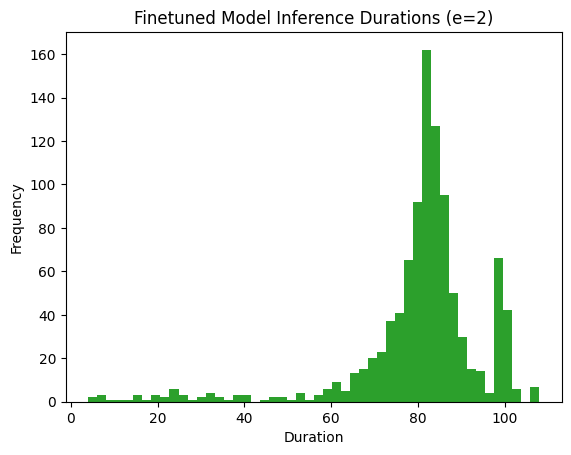

In [41]:
plt.hist(finetuned_model_epochs_2_inference_durations, bins=50, color="tab:green")
plt.title("Finetuned Model Inference Durations (e=2)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

In [42]:
_print_descriptives(finetuned_model_epochs_2_metric_durations)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 0        | 0.0      | 0        | 0.0      | 0.0      | 0.0      | 0        |
+----------+----------+----------+----------+----------+----------+----------+----------+


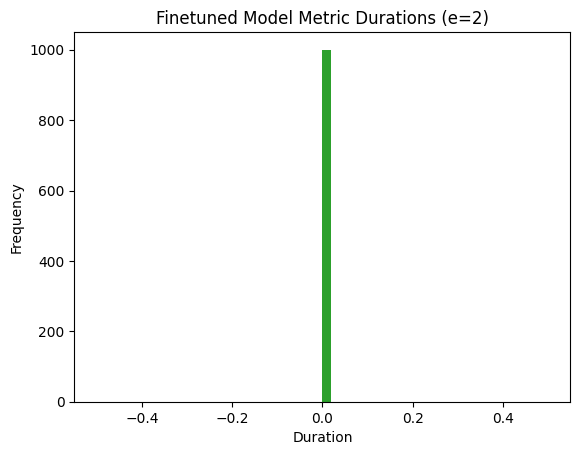

In [43]:
plt.hist(finetuned_model_epochs_2_metric_durations, bins=50, color="tab:green")
plt.title("Finetuned Model Metric Durations (e=2)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

#### 8.2.2.4 Predictions

In [44]:
finetuned_model_epochs_2_prediction_lengths = [len(prediction["prediction"]) for prediction in finetuned_model_epochs_2_predictions]

In [45]:
_print_descriptives(finetuned_model_epochs_2_prediction_lengths)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 291.175  | 503.4539 | 1        | 22.75    | 103.5    | 392.25   | 4215     |
+----------+----------+----------+----------+----------+----------+----------+----------+


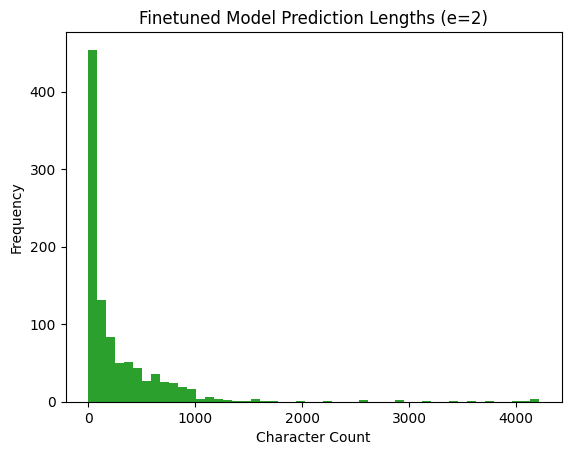

In [46]:
plt.hist(finetuned_model_epochs_2_prediction_lengths, bins=50, color="tab:green")
plt.title("Finetuned Model Prediction Lengths (e=2)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

In [47]:
_print_predictions(finetuned_model_epochs_2_predictions, n=5, ascending=False)

+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| references                                         | question                       | answer                         | prediction                     |
+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| After the Greeks, little happened with the study   | In what year did Pierre de     | 1640                           | 1640                           |
| of prime numbers until the 17th century. In 1640   | Fermat declare Fermat's little |                                |                                |
| Pierre de Fermat stated (without proof) Fermat's   | theorem?                       |                                |                                |
| little theorem (later proved by Leibniz and        |                      

In [48]:
_print_predictions(finetuned_model_epochs_2_predictions, n=5, ascending=True)

+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| references                                         | question                       | answer                         | prediction                     |
+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| Clearly, some tumors evade the immune system and   | What is a chemical secreted by | cytokine TGF-β                 | TGF-β                          |
| go on to become cancers. Tumor cells often have a  | tumors that suppresses the     |                                |                                |
| reduced number of MHC class I molecules on their   | immune response?               |                                |                                |
| surface, thus avoiding detection by killer T       |                      

### 8.2.3 3-Epoch Training Results

In [49]:
finetuned_model_epochs_3_experiment = _load_experiment("case_study_finetune_model_epochs_3")
finetuned_model_epochs_3_predictions = _load_predictions("case_study_finetune_model_epochs_3")

#### 8.2.3.1 Accuracy

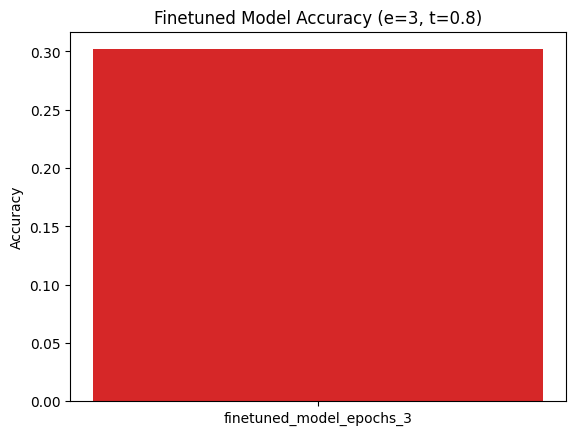

In [50]:
plt.bar(["finetuned_model_epochs_3"], [finetuned_model_epochs_3_experiment["scores"]["accuracy"]], color="tab:red")
plt.title("Finetuned Model Accuracy (e=3, t=0.8)")
plt.ylabel("Accuracy")
plt.show()

#### 8.2.3.2 Similarity

In [51]:
finetuned_model_epochs_3_similarities = _select(finetuned_model_epochs_3_predictions, "similarity")

In [52]:
_print_descriptives(finetuned_model_epochs_2_similarities)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 0.7303   | 0.1698   | 0.0      | 0.6677   | 0.6803   | 0.8507   | 1.0      |
+----------+----------+----------+----------+----------+----------+----------+----------+


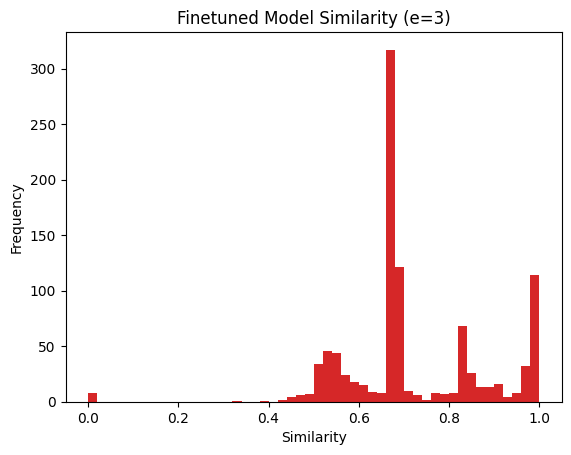

In [53]:
plt.hist(finetuned_model_epochs_3_similarities, bins=50, color="tab:red")
plt.title("Finetuned Model Similarity (e=3)")
plt.xlabel("Similarity")
plt.ylabel("Frequency")
plt.show()

#### 8.2.3.3 Duration

In [54]:
finetuned_model_epochs_3_inference_durations = _select(finetuned_model_epochs_3_predictions, "inference_duration")
finetuned_model_epochs_3_metric_durations = _select(finetuned_model_epochs_3_predictions, "metric_duration")

In [55]:
_print_descriptives(finetuned_model_epochs_3_inference_durations)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 81.809   | 16.3263  | 1        | 78.0     | 84.0     | 91.0     | 112      |
+----------+----------+----------+----------+----------+----------+----------+----------+


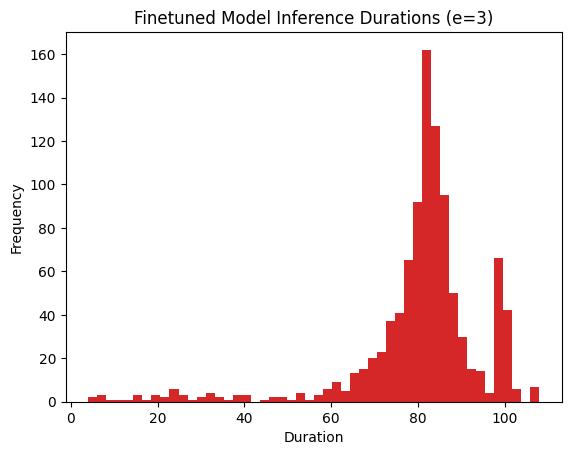

In [56]:
plt.hist(finetuned_model_epochs_2_inference_durations, bins=50, color="tab:red")
plt.title("Finetuned Model Inference Durations (e=3)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

In [57]:
_print_descriptives(finetuned_model_epochs_3_metric_durations)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 0        | 0.0      | 0        | 0.0      | 0.0      | 0.0      | 0        |
+----------+----------+----------+----------+----------+----------+----------+----------+


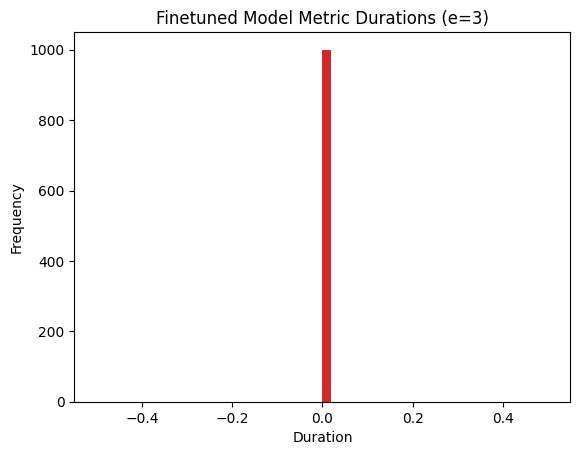

In [58]:
plt.hist(finetuned_model_epochs_3_metric_durations, bins=50, color="tab:red")
plt.title("Finetuned Model Metric Durations (e=3)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

#### 8.2.3.4 Predictions

In [59]:
finetuned_model_epochs_3_prediction_lengths = [len(prediction["prediction"]) for prediction in finetuned_model_epochs_3_predictions]

In [60]:
_print_descriptives(finetuned_model_epochs_3_prediction_lengths)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 395.673  | 733.9579 | 1        | 31.0     | 146.5    | 454.0    | 5097     |
+----------+----------+----------+----------+----------+----------+----------+----------+


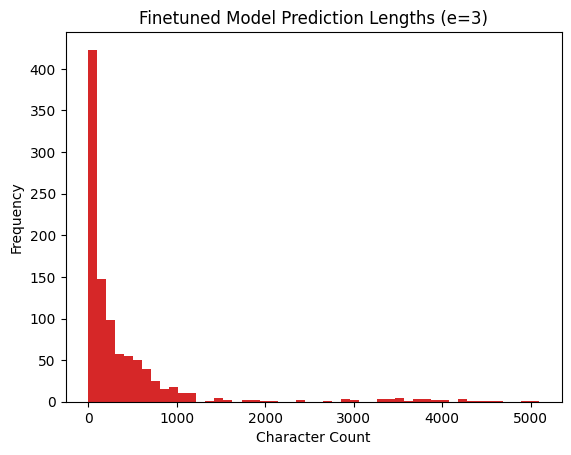

In [61]:
plt.hist(finetuned_model_epochs_3_prediction_lengths, bins=50, color="tab:red")
plt.title("Finetuned Model Prediction Lengths (e=3)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

In [62]:
_print_predictions(finetuned_model_epochs_3_predictions, n=5, ascending=False)

+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| references                                         | question                       | answer                         | prediction                     |
+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| In 1507, he was ordained to the priesthood, and in | When was Martin Luther         | 1507                           | 1507                           |
| 1508, von Staupitz, first dean of the newly        | ordained as a priest?          |                                |                                |
| founded University of Wittenberg, sent for Luther, |                                |                                |                                |
| to teach theology. He received a bachelor's degree |                      

In [63]:
_print_predictions(finetuned_model_epochs_3_predictions, n=5, ascending=True)

+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| references                                         | question                       | answer                         | prediction                     |
+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| Clearly, some tumors evade the immune system and   | What is a chemical secreted by | cytokine TGF-β                 | TGF-β.                         |
| go on to become cancers. Tumor cells often have a  | tumors that suppresses the     |                                |                                |
| reduced number of MHC class I molecules on their   | immune response?               |                                |                                |
| surface, thus avoiding detection by killer T       |                      

## 8.3 Base Model + Advanced Prompt Results

In [64]:
advanced_prompt_experiment = _load_experiment("case_study_advanced_prompt")
advanced_prompt_predictions = _load_predictions("case_study_advanced_prompt")

### 8.3.1 Accuracy

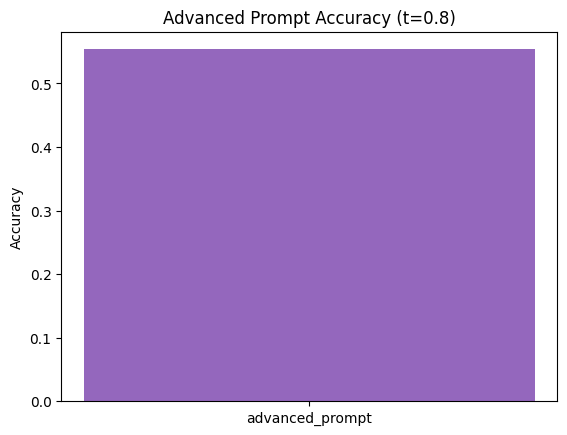

In [65]:
plt.bar(["advanced_prompt"], [advanced_prompt_experiment["scores"]["accuracy"]], color="tab:purple")
plt.title("Advanced Prompt Accuracy (t=0.8)")
plt.ylabel("Accuracy")
plt.show()

### 8.3.2 Similarity

In [66]:
advanced_prompt_similarities = _select(advanced_prompt_predictions, "similarity")

In [67]:
_print_descriptives(advanced_prompt_similarities)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 0.6956   | 0.3587   | 0.0      | 0.5019   | 0.8612   | 1.0      | 1.0      |
+----------+----------+----------+----------+----------+----------+----------+----------+


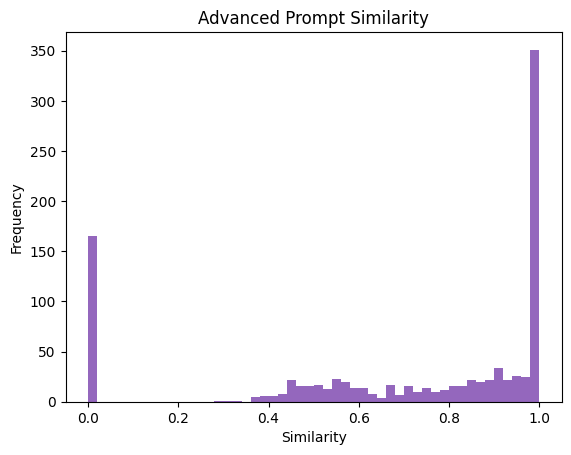

In [68]:
plt.hist(advanced_prompt_similarities, bins=50, color="tab:purple")
plt.title("Advanced Prompt Similarity")
plt.xlabel("Similarity")
plt.ylabel("Frequency")
plt.show()

### 8.3.3 Duration

In [69]:
advanced_prompt_inference_durations = _select(advanced_prompt_predictions, "inference_duration")
advanced_prompt_metric_durations = _select(advanced_prompt_predictions, "metric_duration")

In [70]:
_print_descriptives(advanced_prompt_inference_durations)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 1.159    | 0.5215   | 0        | 1.0      | 1.0      | 1.0      | 7        |
+----------+----------+----------+----------+----------+----------+----------+----------+


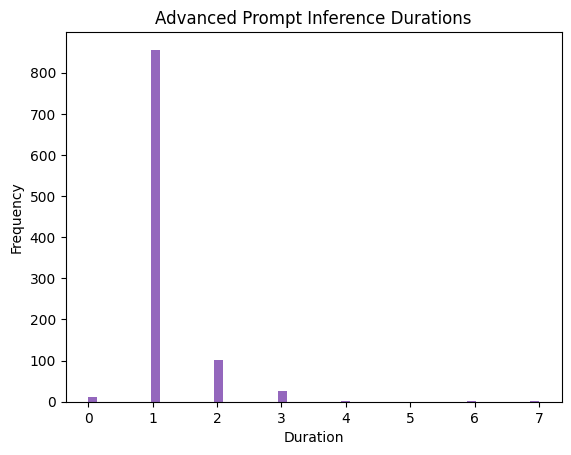

In [71]:
plt.hist(advanced_prompt_inference_durations, bins=50, color="tab:purple")
plt.title("Advanced Prompt Inference Durations")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

In [72]:
_print_descriptives(advanced_prompt_metric_durations)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 0        | 0.0      | 0        | 0.0      | 0.0      | 0.0      | 0        |
+----------+----------+----------+----------+----------+----------+----------+----------+


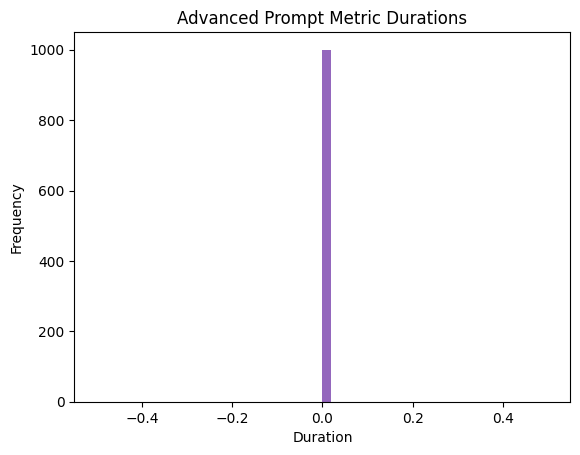

In [73]:
plt.hist(advanced_prompt_metric_durations, bins=50, color="tab:purple")
plt.title("Advanced Prompt Metric Durations")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

### 8.3.4 Predictions

In [74]:
advanced_prompt_prediction_lengths = [len(prediction["prediction"]) for prediction in advanced_prompt_predictions]

In [75]:
_print_descriptives(advanced_prompt_prediction_lengths)

+----------+----------+----------+----------+----------+----------+----------+----------+
| count    | mean     | std      | min      | 25%      | 50%      | 75%      | max      |
+----------+----------+----------+----------+----------+----------+----------+----------+
| 1000     | 19.924   | 24.0652  | 1        | 7.0      | 12.0     | 22.0     | 259      |
+----------+----------+----------+----------+----------+----------+----------+----------+


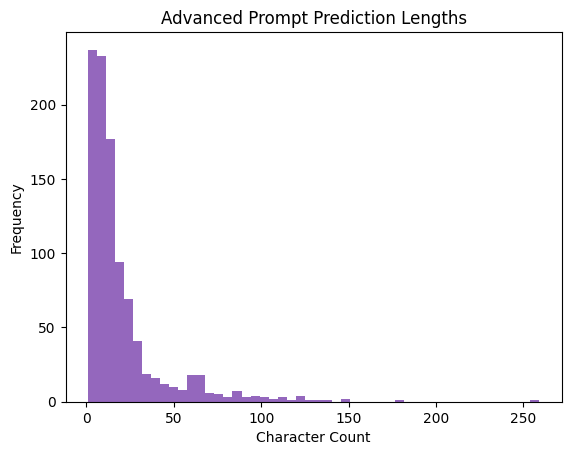

In [76]:
plt.hist(advanced_prompt_prediction_lengths, bins=50, color="tab:purple")
plt.title("Advanced Prompt Prediction Lengths")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

In [77]:
_print_predictions(advanced_prompt_predictions, n=5, ascending=False)

+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| references                                         | question                       | answer                         | prediction                     |
+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| The Mongols learned from captives of the abundant  | Which two Mongol leaders added | Subutai and Jebe               | Subutai and Jebe               |
| green pastures beyond the Bulgar territory,        | Persia to the Mongol Empire?   |                                |                                |
| allowing for the planning for conquest of Hungary  |                                |                                |                                |
| and Europe. Genghis Khan recalled Subutai back to  |                      

In [78]:
_print_predictions(advanced_prompt_predictions, n=5, ascending=True)

+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
| references                                         | question                       | answer                         | prediction                     |
+----------------------------------------------------+--------------------------------+--------------------------------+--------------------------------+
|                                                    | In the Rankine cycle, what     | -                              | Steam                          |
|                                                    | does water turn into when      |                                |                                |
|                                                    | heated?                        |                                |                                |
+----------------------------------------------------+----------------------

## 8.4 Compare Results

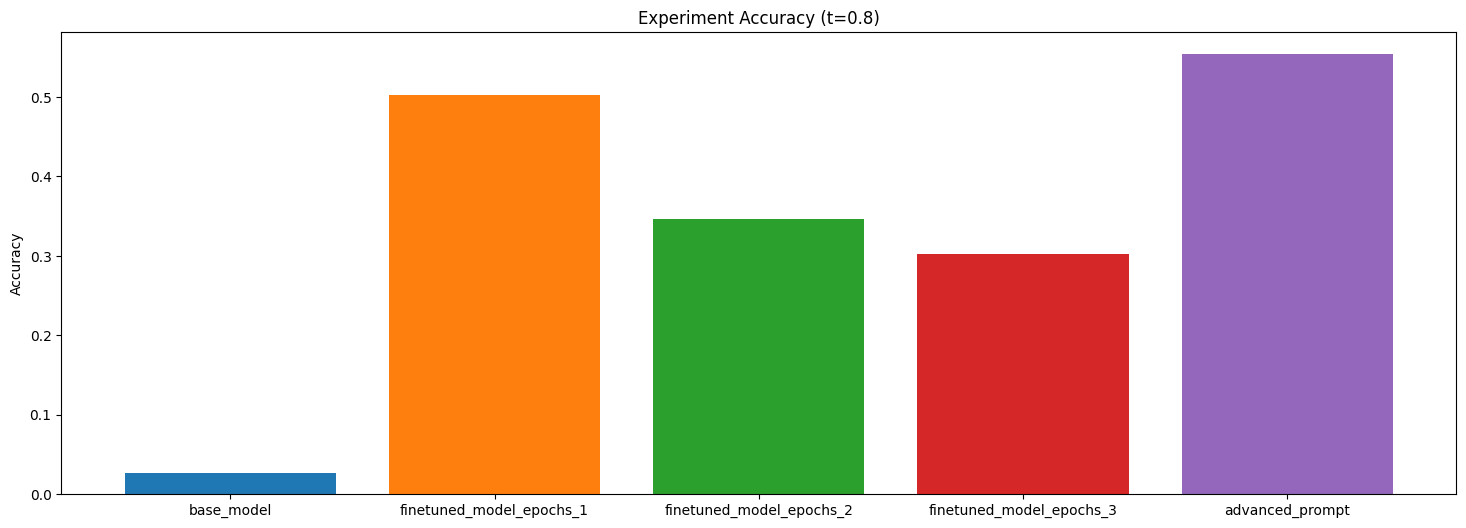

In [79]:
plt.figure(figsize=(18, 6))
plt.bar(
    [
        "base_model",
        "finetuned_model_epochs_1",
        "finetuned_model_epochs_2",
        "finetuned_model_epochs_3",
        "advanced_prompt",
    ],
    [
        base_model_experiment["scores"]["accuracy"],
        finetuned_model_epochs_1_experiment["scores"]["accuracy"],
        finetuned_model_epochs_2_experiment["scores"]["accuracy"],
        finetuned_model_epochs_3_experiment["scores"]["accuracy"],
        advanced_prompt_experiment["scores"]["accuracy"],
    ],
    color=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"],
)
plt.title("Experiment Accuracy (t=0.8)")
plt.ylabel("Accuracy")
plt.show()

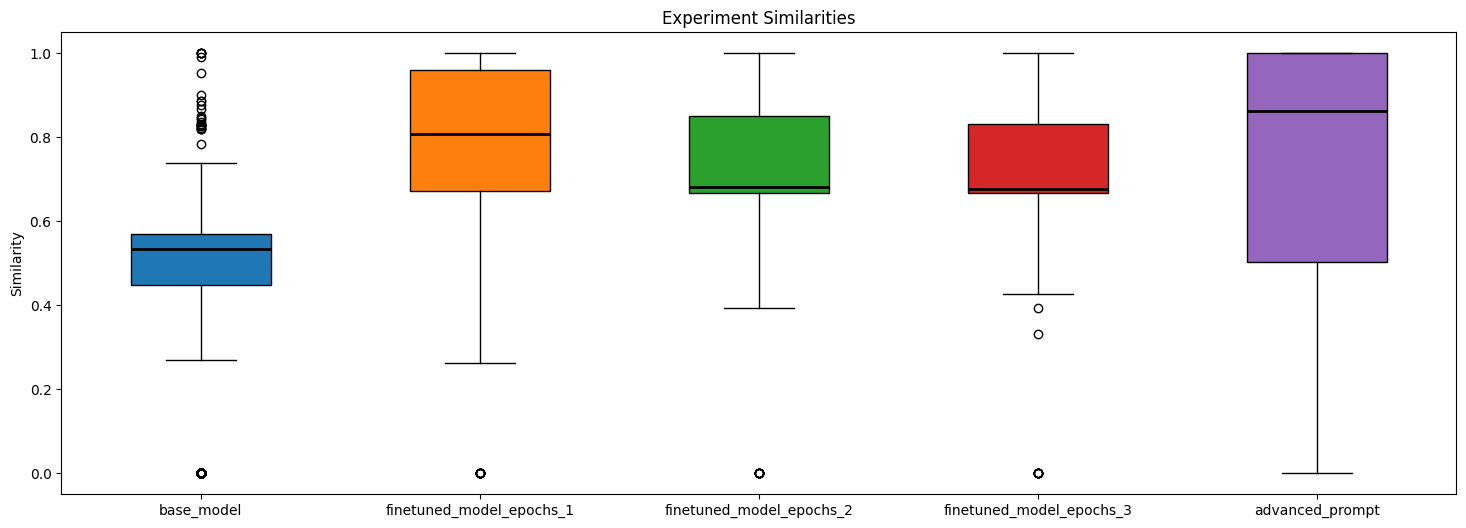

In [80]:
plt.figure(figsize=(18, 6))
bplot = plt.boxplot(
    [
        base_model_similarities,
        finetuned_model_epochs_1_similarities,
        finetuned_model_epochs_2_similarities,
        finetuned_model_epochs_3_similarities,
        advanced_prompt_similarities,
    ],
    labels=[
        "base_model",
        "finetuned_model_epochs_1",
        "finetuned_model_epochs_2",
        "finetuned_model_epochs_3",
        "advanced_prompt",
    ],
    patch_artist=True,
    medianprops={"color": "black", "linewidth": 2},
)
for patch, color in zip(
    bplot["boxes"],
    ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"],
):
    patch.set_facecolor(color)
plt.title("Experiment Similarities")
plt.ylabel("Similarity")
plt.show()

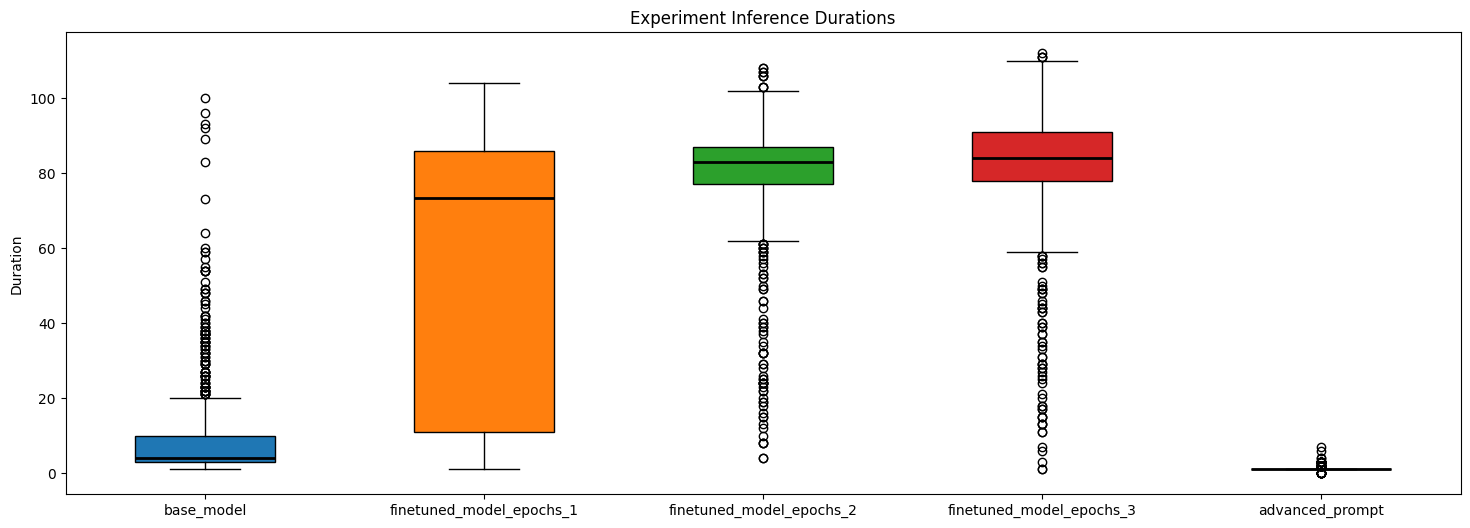

In [81]:
plt.figure(figsize=(18, 6))
bplot = plt.boxplot(
    [
        base_model_inference_durations,
        finetuned_model_epochs_1_inference_durations,
        finetuned_model_epochs_2_inference_durations,
        finetuned_model_epochs_3_inference_durations,
        advanced_prompt_inference_durations,
    ],
    labels=[
        "base_model",
        "finetuned_model_epochs_1",
        "finetuned_model_epochs_2",
        "finetuned_model_epochs_3",
        "advanced_prompt",
    ],
    patch_artist=True,
    medianprops={"color": "black", "linewidth": 2},
)
for patch, color in zip(
    bplot["boxes"],
    ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"],
):
    patch.set_facecolor(color)
plt.title("Experiment Inference Durations")
plt.ylabel("Duration")
plt.show()

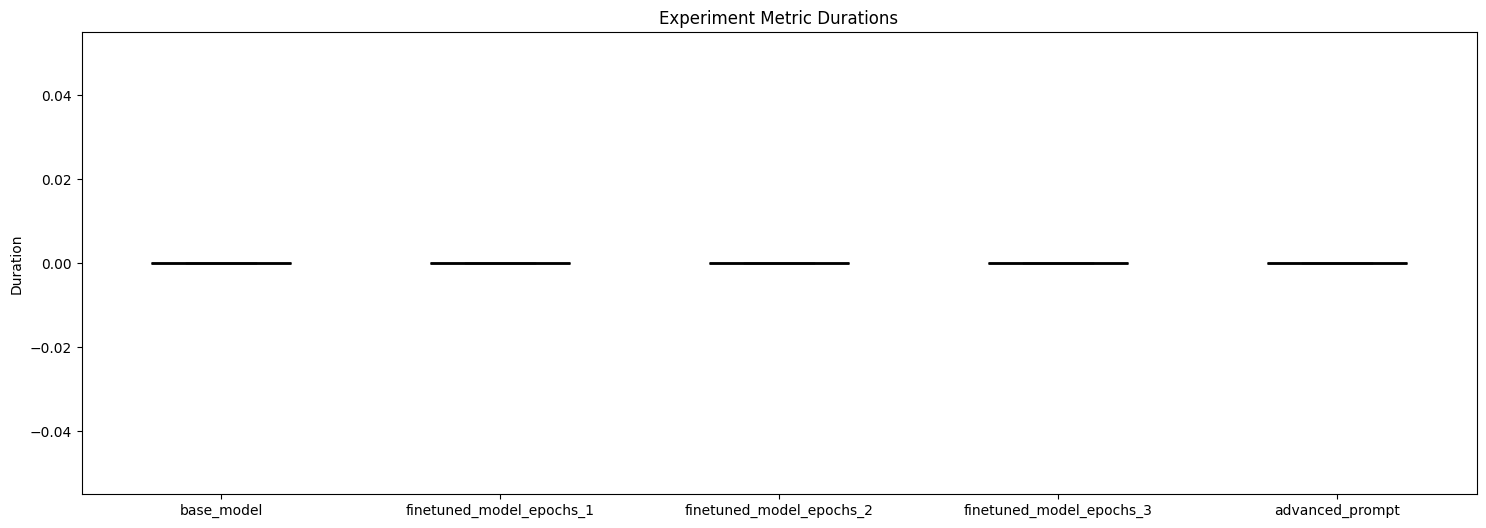

In [82]:
plt.figure(figsize=(18, 6))
bplot = plt.boxplot(
    [
        base_model_metric_durations,
        finetuned_model_epochs_1_metric_durations,
        finetuned_model_epochs_2_metric_durations,
        finetuned_model_epochs_3_metric_durations,
        advanced_prompt_metric_durations,
    ],
    labels=[
        "base_model",
        "finetuned_model_epochs_1",
        "finetuned_model_epochs_2",
        "finetuned_model_epochs_3",
        "advanced_prompt",
    ],
    patch_artist=True,
    medianprops={"color": "black", "linewidth": 2},
)
for patch, color in zip(
    bplot["boxes"],
    ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"],
):
    patch.set_facecolor(color)
plt.title("Experiment Metric Durations")
plt.ylabel("Duration")
plt.show()

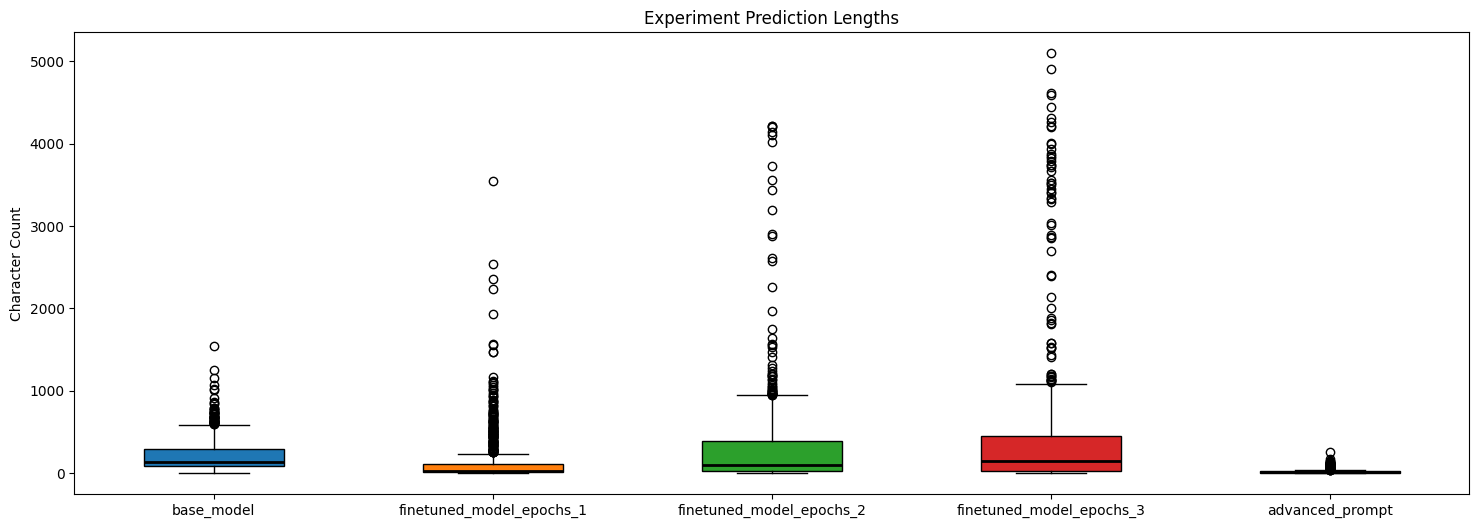

In [83]:
plt.figure(figsize=(18, 6))
bplot = plt.boxplot(
    [
        base_model_prediction_lengths,
        finetuned_model_epochs_1_prediction_lengths,
        finetuned_model_epochs_2_prediction_lengths,
        finetuned_model_epochs_3_prediction_lengths,
        advanced_prompt_prediction_lengths,
    ],
    labels=[
        "base_model",
        "finetuned_model_epochs_1",
        "finetuned_model_epochs_2",
        "finetuned_model_epochs_3",
        "advanced_prompt",
    ],
    patch_artist=True,
    medianprops={"color": "black", "linewidth": 2},
)
for patch, color in zip(
    bplot["boxes"],
    ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"],
):
    patch.set_facecolor(color)
plt.title("Experiment Prediction Lengths")
plt.ylabel("Character Count")
plt.show()